### Advanced Biopython Learning Guide (Jupyter Notebook Format)

In [2]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import ClustalwCommandline
import matplotlib.pyplot as plt

# DARK COLORS
TEXT_COLOR = "white"
BG_COLOR = "black"

plt.rcParams["axes.facecolor"] = plt.rcParams["figure.facecolor"] = BG_COLOR
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR
plt.rcParams.update({
	"axes.grid" : True,
	"grid.color": "green",
	"grid.alpha": 0.35,
	"grid.linestyle": (0, (10, 10)),
})

# BETTER SIZES
DEFAULT_W, DEFAULT_H = (16, 9)
plt.rcParams["figure.figsize"] = [DEFAULT_W, DEFAULT_H]
plt.rcParams["font.size"] = 14
plt.rcParams["figure.dpi"] = 90

/home/toni/.local/pipx/venvs/jupyterlab/lib/python3.11/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


## 1. Working with DNA Sequences

In [3]:
print("--- DNA Sequence Operations ---")
dna_seq = Seq("ATGCTAGCTAGCTAGCTAGCTAGC")
print("Original DNA:", dna_seq)
print("Complement:", dna_seq.complement())
print("Reverse Complement:", dna_seq.reverse_complement())
print("GC Content:", gc_fraction(dna_seq) * 100)

--- DNA Sequence Operations ---
Original DNA: ATGCTAGCTAGCTAGCTAGCTAGC
Complement: TACGATCGATCGATCGATCGATCG
Reverse Complement: GCTAGCTAGCTAGCTAGCTAGCAT
GC Content: 50.0


## 2. Reading and Writing FASTA Files

In [14]:
print("\n--- Reading FASTA File ---")
for record in SeqIO.parse("sampledata/example.fasta", "fasta"):
    print("ID:", record.id)
    print("Sequence:", record.seq[:50], "...")  # Show first 50 bases
    print("Sequence Length:", len(record.seq))


--- Reading FASTA File ---
ID: seq1
Sequence: ATGCGTACGTAGCTAGCTAGCTAGCTAGCTAGC ...
Sequence Length: 33
ID: seq2
Sequence: GCTAGCTAGCTAGCATCGATCGATCGATCGATC ...
Sequence Length: 33
ID: seq3
Sequence: TCGATCGATCGATCGATCGATCGATCGATCGAT ...
Sequence Length: 33


## 3. Translating DNA to Protein

In [5]:
print("\n--- Translating DNA to Protein ---")
mrna_seq = dna_seq.transcribe()
protein_seq = dna_seq.translate()
print("mRNA Sequence:", mrna_seq)
print("Protein Sequence:", protein_seq)


--- Translating DNA to Protein ---
mRNA Sequence: AUGCUAGCUAGCUAGCUAGCUAGC
Protein Sequence: MLAS*LAS


## 4. Running a BLAST Search

In [6]:
print("\n--- Running BLAST Search ---")
result_handle = NCBIWWW.qblast("blastn", "nt", dna_seq)
blast_record = NCBIXML.read(result_handle)
for alignment in blast_record.alignments[:5]:  # Show top 5 hits
    print("Alignment:", alignment.title)
    print("Length:", alignment.length)


--- Running BLAST Search ---


## 5. Restriction Enzyme Analysis

In [7]:
from Bio.Restriction import RestrictionBatch

print("\n--- Restriction Enzyme Analysis ---")
enzymes = RestrictionBatch(["EcoRI", "BamHI", "HindIII"])
sites = enzymes.search(dna_seq)
for enzyme, positions in sites.items():
    print(f"{enzyme} cuts at positions: {positions}")


--- Restriction Enzyme Analysis ---
EcoRI cuts at positions: []
HindIII cuts at positions: []
BamHI cuts at positions: []


## 6. Multiple Sequence Alignment

In [13]:
print("\n--- Multiple Sequence Alignment ---")
alignment = MultipleSeqAlignment([
    SeqIO.read("sampledata/seq1.fasta", "fasta"),
    SeqIO.read("sampledata/seq2.fasta", "fasta"),
    SeqIO.read("sampledata/seq3.fasta", "fasta")
])
print(alignment)

# Running ClustalW (example, requires ClustalW installed)
# clustalw_cline = ClustalwCommandline("clustalw2", infile="example.fasta")
# stdout, stderr = clustalw_cline()


--- Multiple Sequence Alignment ---
Alignment with 3 rows and 33 columns
ATGCGTACGTAGCTAGCTAGCTAGCTAGCTAGC seq1
GCTAGCTAGCTAGCATCGATCGATCGATCGATC seq2
TCGATCGATCGATCGATCGATCGATCGATCGAT seq3


## 7. Genomic Data Visualization


--- Genomic Data Visualization ---


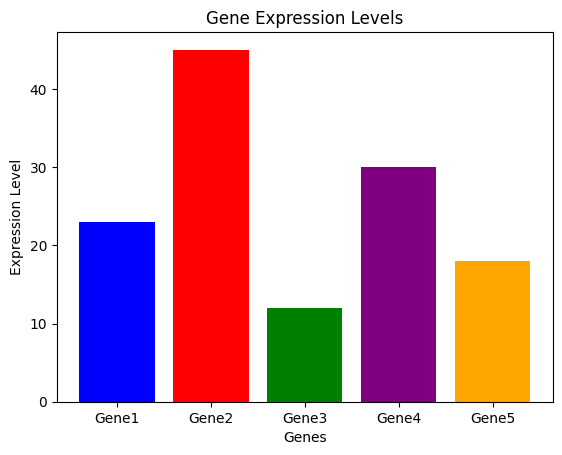

In [15]:
print("\n--- Genomic Data Visualization ---")
genes = ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']
expression_levels = [23, 45, 12, 30, 18]
plt.bar(genes, expression_levels, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel('Genes')
plt.ylabel('Expression Level')
plt.title('Gene Expression Levels')
plt.show()